In [1]:
%pip install chess

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chess
import seaborn as sns
import chess.pgn

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
pal = sns.color_palette()

C:\Users\dpatel7\AppData\Local\Temp\ipykernel_25668\4043888973.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# Chess Data Analysis Using Python

In this Notebook, I will attempt to:
1. Look at the general trends from the archive of games.
2. Review top pairings and players.
3. Use the chess python package to review a game
4. Use the stockfish engine to analyze a game position
5. See if we can successfully catch someone who might be using an engine during games.

Our dataset is a collection of all professional chess games played from the year 2012.

## General Chess Trends

In [3]:
df = pd.read_csv(r"C:\twic_master.csv")
df.head()
#df.info()

C:\Users\dpatel7\AppData\Local\Temp\ipykernel_25668\2904052967.py:1: DtypeWarning: Columns (10,13,14,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\twic_master.csv")


,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476.0,1503014.0,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192.0,4611500.0,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045.0,24101605.0,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737.0,4115341.0,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507.0,13300474.0,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Which players occur the most in the archive? 

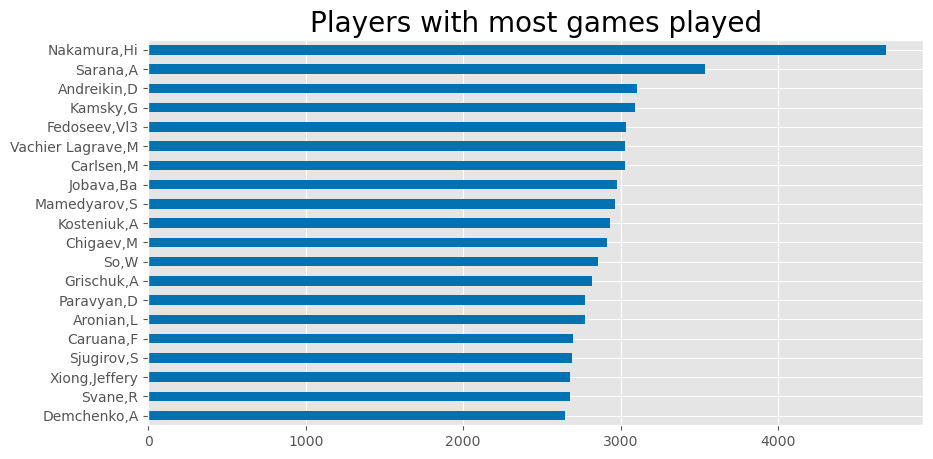

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
pd.concat([df['White'], df['Black']]).value_counts(ascending=True).tail(20).plot(kind='barh',
                    ax=ax)
ax.set_title('Players with most games played', fontsize=20)
plt.show()

### What were the top openings used each year? 

In [5]:
#change dtype of date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [6]:
df['Year'].value_counts()

Year
2021    302824
2022    226060
2020    222457
2019    188686
2018    185950
2017    173494
2016    154094
2015    142258
2013    141690
2014    140827
2012     92916
2011        54
2010         6
2005         1
1988         1
2029         1
Name: count, dtype: int64

In [7]:
df = df.query('2023 > Year > 2012')

#query taking too long to run
#df.groupby(["Year", "Opening"]).value_counts()

In [8]:
df.groupby(["Year", "Opening"]).size().unstack()

Opening,?,Alapin's opening,Alekhine's defence,Amar (Paris) opening,Amar gambit,Anderssen's opening,Anti-Borg (Desprez) opening,Barnes defence,Battambang opening,Beefeater defence,Benko Gambit Declined: Main Line,Benko gambit,Benko gambit accepted,Benko gambit half accepted,Benko's opening,Benoni,Benoni Defense: Czech Benoni Defense,Benoni defence,"Benoni defence, Hromodka system",Bird,Bird's opening,Bishop's opening,Blackburne shilling gambit,Blackmar gambit,Blackmar-Diemer,Blackmar-Diemer gambit,Blumenfeld counter-gambit,Blumenfeld counter-gambit accepted,"Blumenfeld counter-gambit, Dus-Chotimursky variation","Blumenfeld counter-gambit, Spielmann variation",Boden-Kieseritsky gambit,Bogo-Indian defence,"Bogo-Indian defence, Gruenfeld variation","Bogo-Indian defence, Monticelli trap","Bogo-Indian defence, Nimzovich variation",Budapest,Budapest defence,Budapest defence declined,Canard opening,Caro-Kann,Caro-Kann Defense,Caro-Kann Defense: Classical Variation,Caro-Kann Defense: Gurgenidze System,Caro-Kann Defense: Tartakower Variation,"Caro-Kann Defense: Two Knights Attack, Mindeno Variation, Exchange Line",Caro-Kann defence,Caro-Masi defence,Carr's defence,Catalan,Catalan Opening,Catalan Opening: Closed,Catalan Opening: Open Defense,Catalan opening,Centre game,"Clemenz (Mead's, Basman's or de Klerk's) opening",Colle system,Corn stalk defence,Crab opening,Czech Benoni,Czech Benoni defence,Damiano's defence,Danish gambit,Doery defence,Dresden opening,"Dunst (Sleipner, Heinrichsen) opening","Dunst (Sleipner,Heinrichsen) opening",Durkin's attack,Dutch,Dutch Defense,Dutch defence,"Dutch defence, Alekhine variation","Dutch defence, Blackburne variation","Dutch defence, Rubinstein variation",Dutch with c4 & Nc3,Dutch with c4 & g3,"Dutch, 2.Bg5 variation","Dutch, Korchnoi attack","Dutch, Krejcik gambit","Dutch, Manhattan (Alapin, Ulvestad) variation","Dutch, Spielmann gambit","Dutch, Von Pretzel gambit","Dutch-Indian, Alekhine variation",Dzindzikhashvili defence,English,English Defense,"English Opening: Anglo-Indian Defense, King's Indian Formation","English Opening: Anglo-Indian Defense, Queen's Indian Formation",English Opening: King's English Variation,"English Opening: King's English Variation, Kramnik-Shirov Counterattack",English Opening: Mikenas-Carls Variation,English Opening: Symmetrical Variation,English opening,English orang-utan,"English, 1...Nf6 (Anglo-Indian defense)","English, Keres variation","English, Kramnik-Shirov counterattack","English, Nimzovich variation","English, Nimzovich, Flohr variation","English, Smyslov defence","English, Troeger defence",Evans counter-gambit,Evans gambit,Evans gambit declined,"Evans gambit declined, 5.a4","Evans gambit declined, Cordel variation","Evans gambit declined, Showalter variation",Four Knights Game: Gunsberg Variation,"Four Knights Game: Spanish Variation, Rubinstein Variation",Four knights,Four knights game,Fred,French,"French Defense: Classical Variation, Steinitz Variation","French Defense: Steinitz Variation, Boleslavsky Variation","French Defense: Tarrasch Variation, Closed Variation",French defence,"French defence, Steiner variation",Fried fox defence,Gedult attack,Gedult's opening,Giuoco Pianissimo,Giuoco Piano,Giuoco piano,Global opening,Greco defence,Grob,Grob's attack,Gruenfeld,Gruenfeld defence,Gruenfeld with Bf4 e3,Gruenfeld with e3 Bd3,Gruenfeld with e3 & Qb3,Guatemala defence,Gunderam defence,Halasz gambit,Hammerschlag (Fried fox/Pork chop opening),Hawk (Habichd) defence,Hippopotamus defence,Horwitz Defense,Hungarian defence,Indian Defense,Inverted Hanham,Inverted Hungarian,KGA,KGD,KP,Kevitz-Trajkovich defence,King's Indian,"King's Indian Defense: Fianchetto Variation, Uhlmann-Szabo System",King's Indian Defense: Orthodox Variation,"King's Indian Defense: Orthodox Variation, Gligoric-Taimanov System",King's Indian defence,"King's Indian defence, 3.Nc3",King's Indian with e4 & g3,"King's Indian, 3.Nf3",King's gambit,King's gambit accepted,King's knight opening,King's

In [9]:
df['Year'].unique().sort()

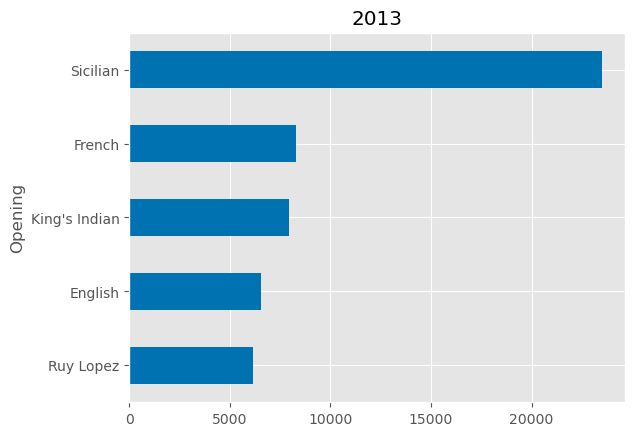

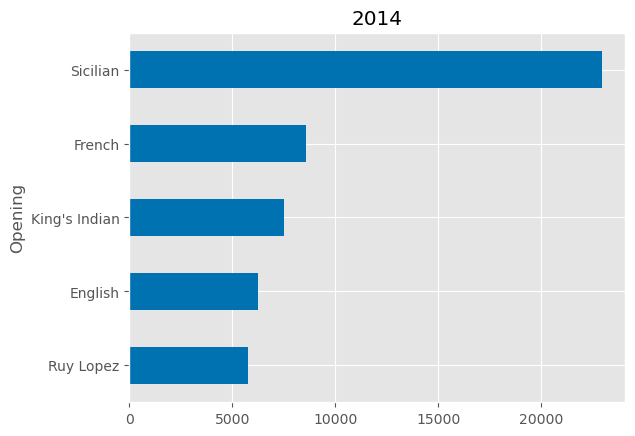

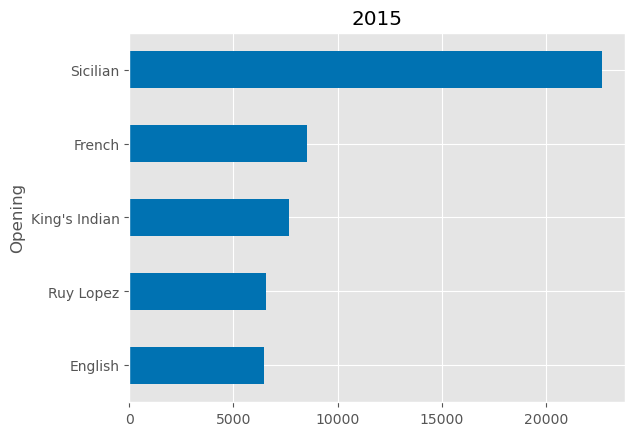

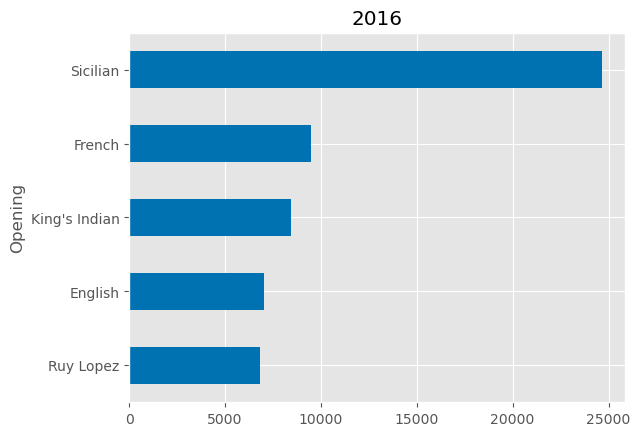

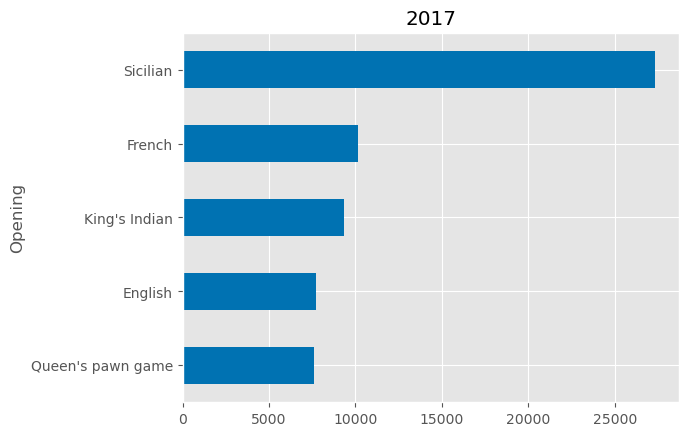

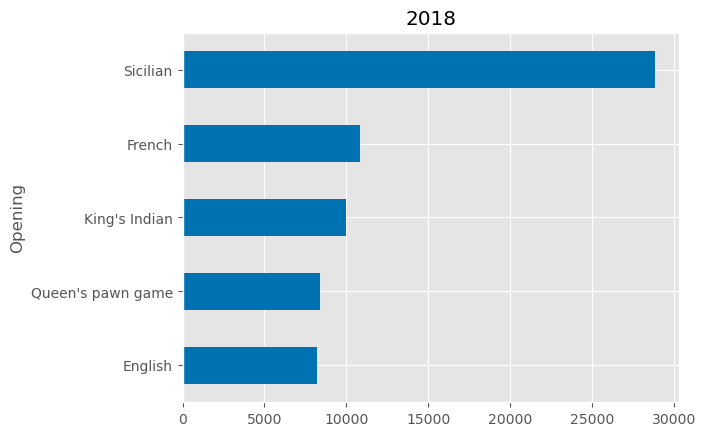

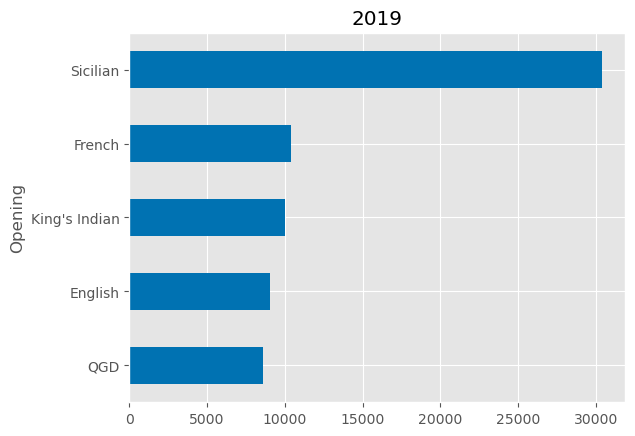

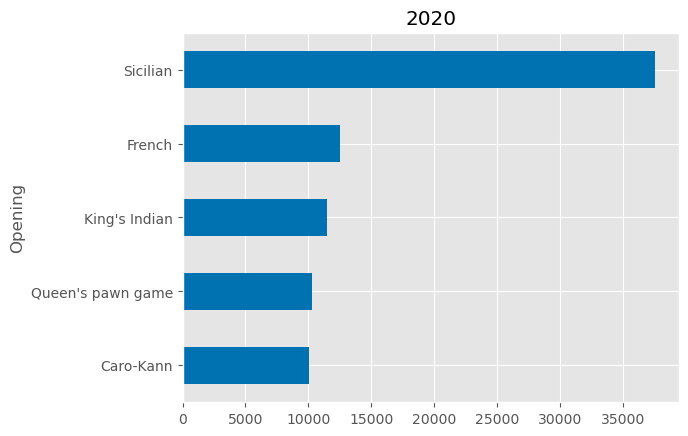

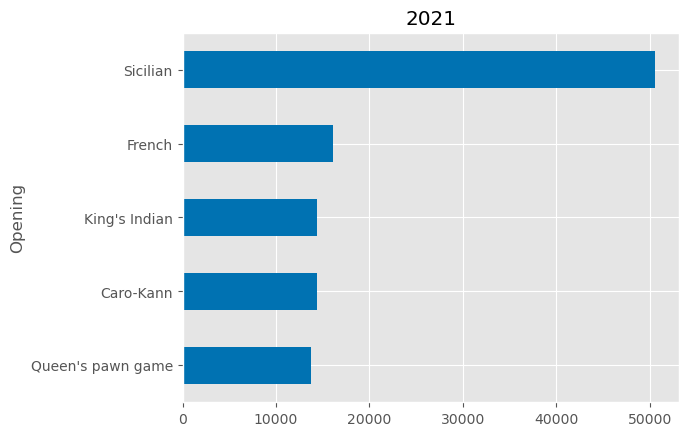

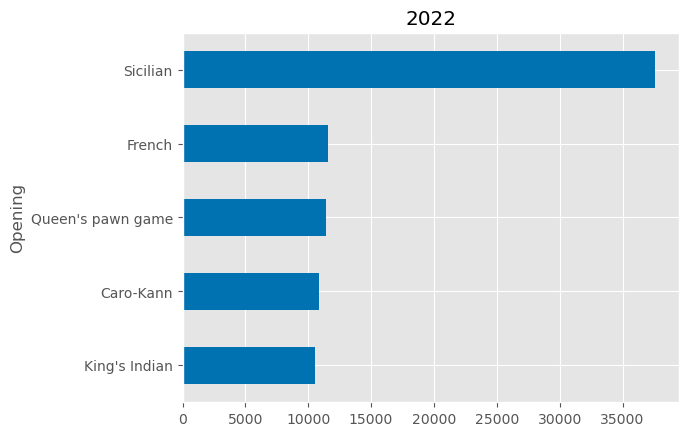

In [10]:
#myyear = 2018
#
for myyear in range(2013, 2023):
    df.query('Year == @myyear')['Opening'].value_counts(ascending = True).tail(5).plot(kind = 'barh', title = myyear)
    plt.show()

#sicilian is a clear choice for most chess players
#does not quite help us as there is not much change over the years

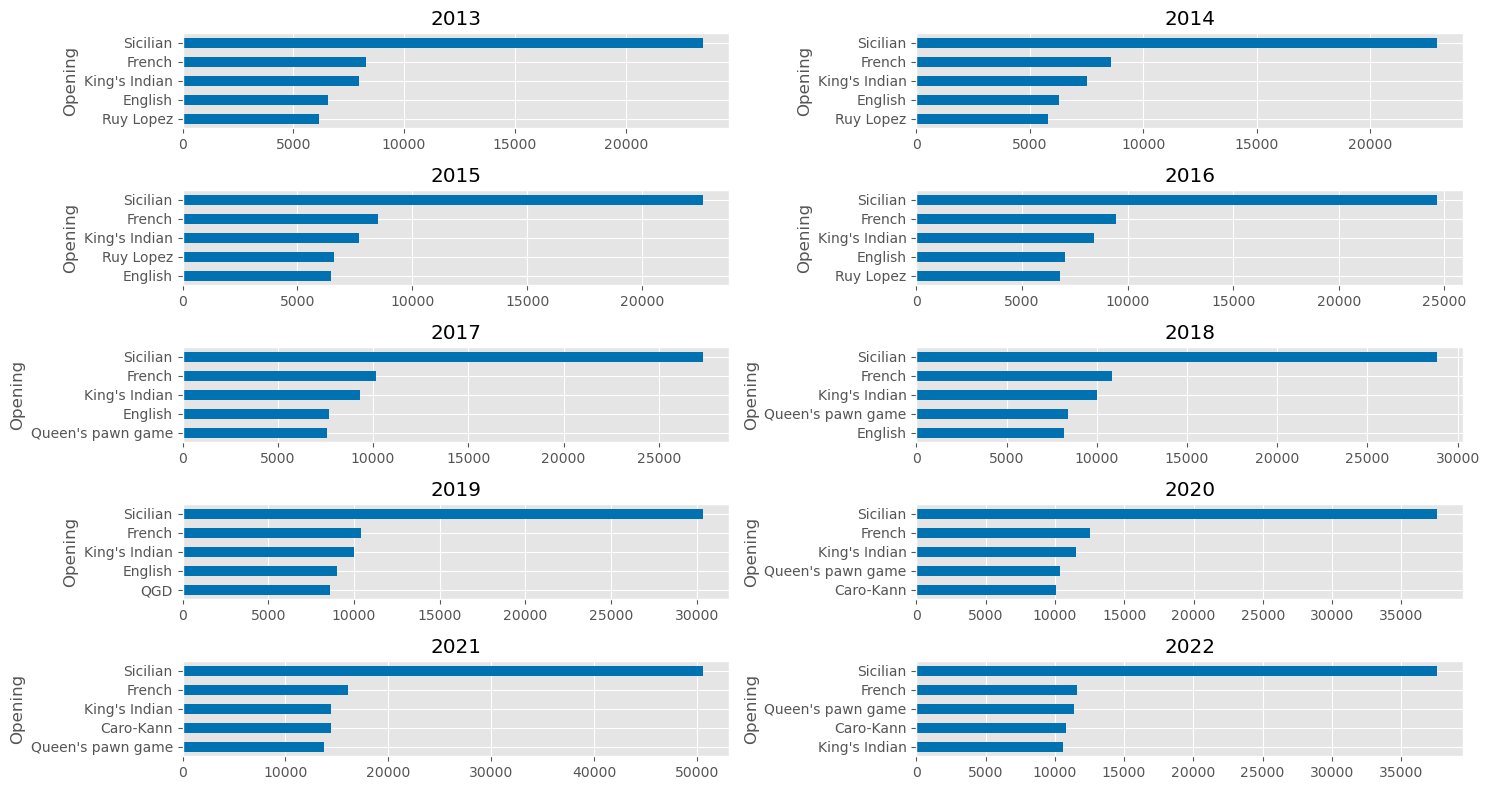

In [11]:
fig, axs = plt.subplots(5, 2, figsize=(15,8))
axs = axs.flatten()

for i, myyear in enumerate(range(2013, 2023)):
    df.query('Year == @myyear')['Opening'].value_counts(ascending = True).tail(5).plot(kind = 'barh', title = myyear,ax = axs[i])
plt.tight_layout()
plt.show()


### What % of the games were played online and how many were played over-the-board?

In [12]:
df['Week'] = df['Date'].dt.isocalendar().week

In [13]:
df = df.sort_values('Date')
df

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week
1503145,948,"Maroroa,S","Higgs,Joshua",2013-01-01,2012.12.28,88th Hastings Masters,1-0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. O-O Nf6 5. d...,Hastings ENG,False,5.36,C55,two knights,4301498.0,426920.0,2037.0,1792.0,Max Lange attack,WIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
1504605,948,"Nijman,B","Russell,MKA",2013-01-01,2012.12.31,120th ch-NZL,1/2-1/2,1. e4 c6 2. c4 d5 3. cxd5 cxd5 4. exd5 Nf6 5. ...,Wellington NZL,False,2.4,B10,Caro-Kann,4302311.0,9900500.0,2113.0,2274.0,anti-anti-Caro-Kann defence,NaN,NaN,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
1504604,948,"Smith,Ro","Thomas,Ben NZL",2013-01-01,2012.12.31,120th ch-NZL,1-0,1. e4 e6 2. d3 d5 3. Nd2 Nf6 4. Ngf3 Bc5 5. e5...,Wellington NZL,False,2.3,C00,French,4300190.0,NaN,2212.0,NaN,King's Indian attack,FM,NaN,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
1504603,948,"Green,E","Wastney,S",2013-01-01,2012.12.31,120th ch-NZL,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...,Wellington NZL,False,2.2,C67,Ruy Lopez,4300114.0,4300513.0,2234.0,2313.0,"Berlin defence, open variation",FM,FM,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
1504602,948,"Hague,B","Steadman,M",2013-01-01,2012.12.31,120th ch-NZL,1-0,1. d4 e6 2. Nf3 f5 3. Bf4 Nf6 4. e3 b6 5. Nbd2...,Wellington NZL,False,2.1,A40,Queen's pawn,405647.0,4300548.0,2322.0,2195.0,NaN,FM,FM,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866687,1455,"Panesar,Vedant","Aronyak,Ghosh",2022-09-26,2022.09.19,Chhattisgarh CM Masters,1/2-1/2,1. d4 d5 2. Nf3 Nf6 3. c4 dxc4 4. e3 e6 5. Bxc...,Raipur IND,False,8.5,D27,QGA,35033018.0,25072846.0,2336.0,2519.0,"classical, Geller variation",FM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39
1866685,1455,"Sammed Jaykumar,Shete","Tahbaz,Arash",2022-09-26,2022.09.19,Chhattisgarh CM Masters,1/2-1/2,1. d4 d5 2. c4 e6 3. Nf3 Nf6 4. Nc3 Be7 5. Bf4...,Raipur IND,False,8.3,D37,QGD,5073421.0,12528846.0,2387.0,2437.0,classical variation (5.Bf4),IM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39
1866684,1455,"Ajay,Karthikeyan","Batchuluun,T",2022-09-26,2022.09.19,Chhattisgarh CM Masters,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. d3 Nf6 5. Bg...,Raipur IND,False,8.2,C50,Giuoco Pianissimo,35011685.0,4900847.0,2422.0,2478.0,NaN,IM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39
1866692,1455,"Shyam,SM","Rajesh,VA",2022-09-26,2022.09.19,Chhattisgarh CM Masters,1-0,1. d4 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. e...,Raipur IND,False,8.10,D87,Gruenfeld,5019141.0,5029317.0,2526.0,2331.0,"exchange, Spassky variation",GM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39


In [14]:
df['Online']

1503145    False
1504605    False
1504604    False
1504603    False
1504602    False
           ...  
1866687    False
1866685    False
1866684    False
1866692    False
1866690    False
Name: Online, Length: 1878340, dtype: bool

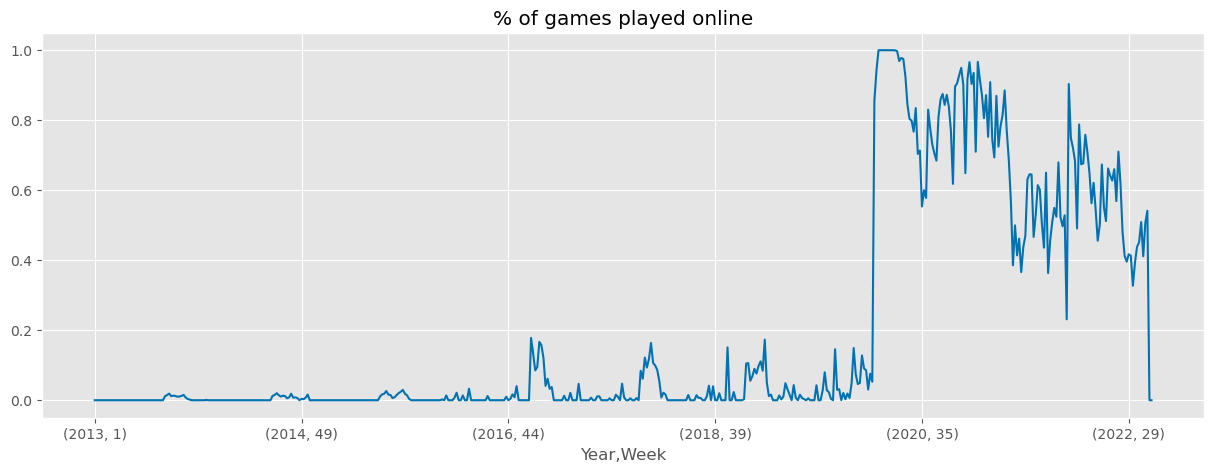

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['Year', 'Week'])['Online'].mean().plot(title = '% of games played online')
plt.show()

**Clear effects of the Covid-19 virus can be seen as almost all games were played online starting from late-2019 up until early-2022.**

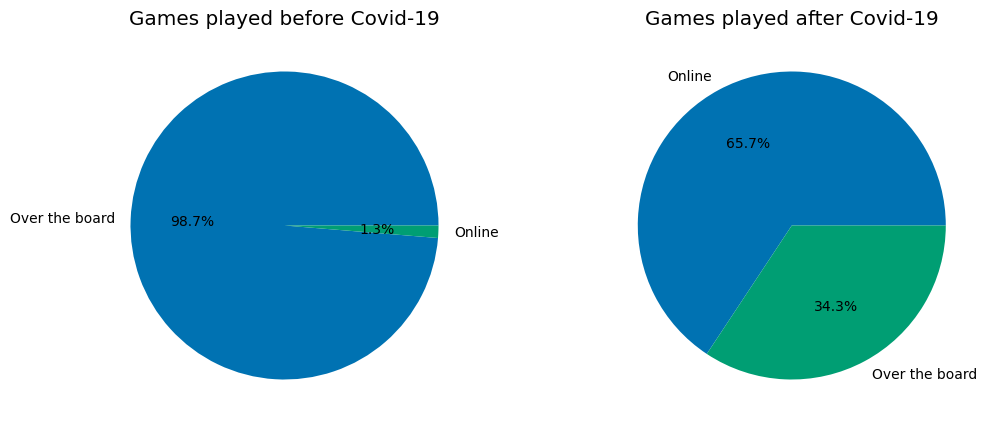

In [16]:
#pie chart to show the % of games played online between 2013 and 2019
df_preCovid = df.query('Year < 2020')
df_postCovid = df.query('Year > 2019')

#games played online vs over the board before the Covid-19 pandemic
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
labels1 = ['Over the board', 'Online']
labels2 = ['Online', 'Over the board']

#df_preCovid['Online'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'Games played Pre-Covid', labels = labels1, ax = ax)
ax1.pie(df_preCovid['Online'].value_counts(), labels = labels1, autopct='%1.1f%%')
ax2.pie(df_postCovid['Online'].value_counts(), labels = labels2, autopct='%1.1f%%')
#ax.set_ylabel('')
ax1.set_title('Games played before Covid-19')
ax2.set_title('Games played after Covid-19')
plt.show()

#games played online vs over the board after the Covid-19 pandemic
# fig, ax = plt.subplots(figsize=(15,5))
# df_postCovid['Online'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'Games played Pre-Covid', labels = labels1, ax = ax)
# ax.set_ylabel('')
# plt.show()


**The drastic effects of Covid-19 can be seen as a large portion of the major chess tournaments had to played online. But this also generated a new influx of chess fans and renewed interest in this ancient game**

## Using python-chess package to review games 

###     Find the games with the biggest upset

In [17]:
df_elo = df.dropna(subset=['BlackElo', 'WhiteElo']).astype({'BlackElo': int, 'WhiteElo' : int}).copy()
df_elo['Elo_diff'] = (df_elo['BlackElo'] - df_elo['WhiteElo'])
df_elo['Elo_diff']

1503145   -245
1504605    161
1504603     79
1504602   -127
1503852   -172
          ... 
1866687    183
1866685     50
1866684     56
1866692   -195
1866690     85
Name: Elo_diff, Length: 1768600, dtype: int32

In [18]:
df_elo.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week,Elo_diff
1503145,948,"Maroroa,S","Higgs,Joshua",2013-01-01,2012.12.28,88th Hastings Masters,1-0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. O-O Nf6 5. d...,Hastings ENG,False,5.36,C55,two knights,4301498.0,426920.0,2037,1792,Max Lange attack,WIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,-245
1504605,948,"Nijman,B","Russell,MKA",2013-01-01,2012.12.31,120th ch-NZL,1/2-1/2,1. e4 c6 2. c4 d5 3. cxd5 cxd5 4. exd5 Nf6 5. ...,Wellington NZL,False,2.4,B10,Caro-Kann,4302311.0,9900500.0,2113,2274,anti-anti-Caro-Kann defence,NaN,NaN,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,161
1504603,948,"Green,E","Wastney,S",2013-01-01,2012.12.31,120th ch-NZL,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...,Wellington NZL,False,2.2,C67,Ruy Lopez,4300114.0,4300513.0,2234,2313,"Berlin defence, open variation",FM,FM,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,79
1504602,948,"Hague,B","Steadman,M",2013-01-01,2012.12.31,120th ch-NZL,1-0,1. d4 e6 2. Nf3 f5 3. Bf4 Nf6 4. e3 b6 5. Nbd2...,Wellington NZL,False,2.1,A40,Queen's pawn,405647.0,4300548.0,2322,2195,NaN,FM,FM,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,-127
1503852,948,"Bagri,J","Moser,Gui",2013-01-01,2013.01.01,Hilton Master Open 2013,1-0,1. c4 e6 2. g3 Nf6 3. Bg2 d5 4. Nf3 Be7 5. O-O...,Basel SUI,False,1.43,A14,English,1307347.0,1309668.0,2178,2006,Neo-Catalan declined,NaN,NaN,NaN,NaN,swiss,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,-172


<Axes: ylabel='Frequency'>

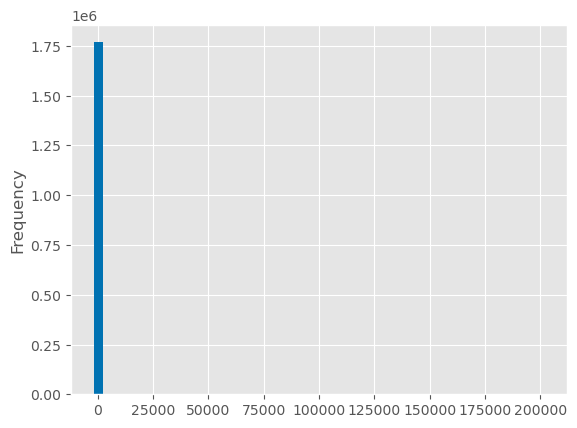

In [19]:
df_elo['Elo_diff'].plot(kind='hist', bins=50)

**My interpretation of this histogram would be that there must be an outlier.**

In [20]:
df_elo['Elo_diff'].max()


201942

In [21]:
df_elo.loc[df_elo['Elo_diff'] == 201942]


,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week,Elo_diff
1662955,1039,"Claesen,P","Decoster,F",2014-09-28,2014.09.28,TCh-BEL 2014-15,1/2-1/2,1. e4 c5 2. c4 Nc6 3. Nc3 e6 4. g3 g6 5. Bg2 B...,Belgium BEL,False,1.5,B20,Sicilian defence,200727.0,204269.0,2327,204269,NaN,IM,FM,Fontaine 1,KBSK 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,39,201942


**An ELO rating of 204269 is not achievable. Clearly that is a misentry/typo and out assumption was correct. Let us clean the data by removing this entry so that we can plot a histogram that gives us a better interpretation of the games played.**

In [22]:
df_elo = df_elo.drop(1662955)

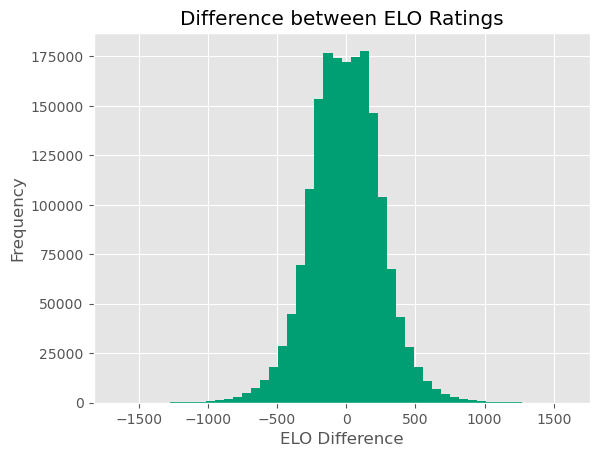

In [23]:
ax = df_elo['Elo_diff'].plot(kind='hist', bins=50, title = 'Difference between ELO Ratings', color = pal[1])
ax.set_xlabel('ELO Difference')
plt.show()

In [24]:
df_elo[['WhiteElo', 'BlackElo', 'Elo_diff', 'Result']]

,WhiteElo,BlackElo,Elo_diff,Result
1503145,2037,1792,-245,1-0
1504605,2113,2274,161,1/2-1/2
1504603,2234,2313,79,1/2-1/2
1504602,2322,2195,-127,1-0
1503852,2178,2006,-172,1-0
...,...,...,...,...
1866687,2336,2519,183,1/2-1/2
1866685,2387,2437,50,1/2-1/2
1866684,2422,2478,56,1/2-1/2
1866692,2526,2331,-195,1-0


In [25]:
df_elo['WhiteIsRatedHigher'] = df_elo['WhiteElo'] > df_elo['BlackElo']

In [26]:
df_upsets = (
    df_elo.query("(WhiteIsRatedHigher and Result == '0-1') or (not WhiteIsRatedHigher and Result == '1-0')"
    ).reset_index(drop=True).copy()
)

In [27]:
df_upsets[['WhiteElo', 'BlackElo', 'Elo_diff', 'Result']]

,WhiteElo,BlackElo,Elo_diff,Result
0,1940,2158,218,1-0
1,2245,2094,-151,0-1
2,2547,2148,-399,0-1
3,2102,2315,213,1-0
4,1964,2013,49,1-0
...,...,...,...,...
333477,2491,2358,-133,0-1
333478,2510,2521,11,1-0
333479,2044,2352,308,1-0
333480,2214,2513,299,1-0


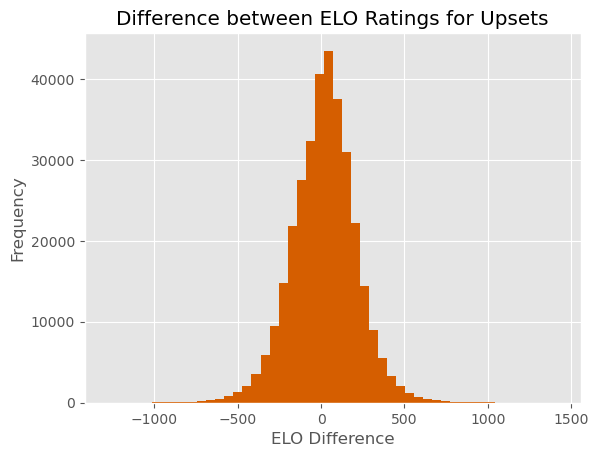

In [28]:
#upsets across all ELO levels
ax = df_upsets['Elo_diff'].plot(
    kind='hist',
    bins=50,
    title = 'Difference between ELO Ratings for Upsets',
    color = pal[2])
ax.set_xlabel('ELO Difference')
plt.show()

In [29]:
df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week,Elo_diff,WhiteIsRatedHigher
2,948,"Hebden,M","Kvisla,J",2013-01-01,2012.12.28,88th Hastings Masters,0-1,1. d4 d5 2. Nf3 Nf6 3. c4 e6 4. Bg5 Be7 5. Nc3...,Hastings ENG,False,5.18,D58,QGD,400084.0,1504533.0,2547,2148,Tartakower (Makagonov-Bondarevsky) system,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,-399,True
6,948,"Kulaots,K",Gao Rui,2013-01-01,2012.12.28,88th Hastings Masters,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Nc6 4. O-O Bd7 5. R...,Hastings ENG,False,5.5,B51,Sicilian,4500261.0,8602387.0,2581,2450,"Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) a...",GM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,-131,True
7,948,"Kjartansson,G","Vovk,A",2013-01-01,2012.12.28,88th Hastings Masters,1-0,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...,Hastings ENG,False,5.6,E98,King's Indian,2301318.0,14114470.0,2404,2567,"orthodox, Aronin-Taimanov, 9.Ne1",IM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,163,False
12,948,"Martynov,P2","Hillarp Persson,T",2013-01-01,2012.12.27,XLII Rilton Cup,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Qxd4 Nc6 5. B...,Stockholm SWE,False,5.11,B53,"Sicilian, Chekhover variation",4122186.0,1700812.0,2298,2546,NaN,FM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,248,False
13,948,"Ulibin,M","Johansson,Linus",2013-01-01,2012.12.27,XLII Rilton Cup,0-1,1. d4 Nf6 2. c4 e6 3. g3 c5 4. d5 exd5 5. cxd5...,Stockholm SWE,False,5.7,A62,Benoni,4101405.0,1711113.0,2533,2312,fianchetto variation,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,-221,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333451,1455,"Vuckovic,Bo","Damljanovic,B",2022-09-25,2022.09.20,TCh-SRB Premier 2022,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Vrnjacka Banja SRB,False,6.2,B60,Sicilian,922277.0,900125.0,2559,2436,Richter-Rauzer,GM,GM,JELICA PEP - Goracici,BATA COSIC - Opovo,team,NaN,NaN,NaN,NaN,NaN,NaN,2022,38,-123,True
333460,1455,"Koustav,Chatterjee","Ajay,Karthikeyan",2022-09-25,2022.09.19,Chhattisgarh CM Masters,0-1,1. d4 g6 2. Nf3 Bg7 3. c4 c5 4. e4 d6 5. d5 Nf...,Raipur IND,False,7.4,A40,Modern defence,25073060.0,35011685.0,2513,2422,NaN,IM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,38,-91,True
333461,1455,"Utsab,Chatterjee","Paichadze,L",2022-09-25,2022.09.19,Chhattisgarh CM Masters,1-0,1. e4 c6 2. d4 d5 3. exd5 cxd5 4. Nf3 Nf6 5. N...,Raipur IND,False,7.11,B13,Caro-Kann,46609148.0,13602934.0,2332,2560,exchange variation,NaN,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,38,228,False
333478,1455,"Shuvalova,Polina","Kosteniuk,A",2022-09-26,2022.09.18,Astana WGP 2022,1-0,1. d4 d5 2. Nf3 Nf6 3. Bf4 c5 4. e3 Nc6 5. Nbd...,Astana KAZ,False,8.1,D02,Queen's bishop game,24171760.0,4128125.0,2510,2521,NaN,IM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39,11,False


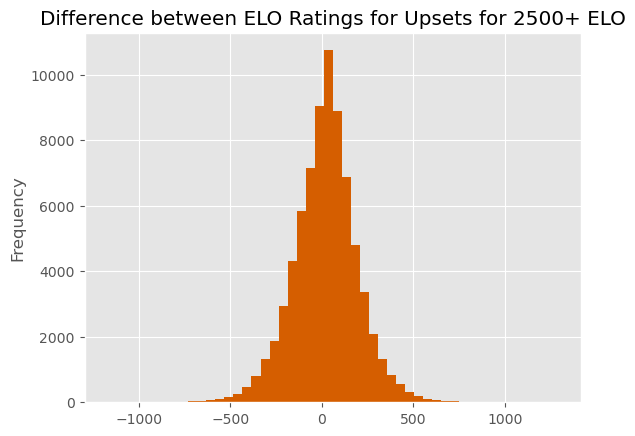

In [30]:
#upsets across all ELO levels
ax = df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500]['Elo_diff'].plot(
    kind='hist',
    bins=50,
    title = 'Difference between ELO Ratings for Upsets for 2500+ ELO',
    color = pal[2])

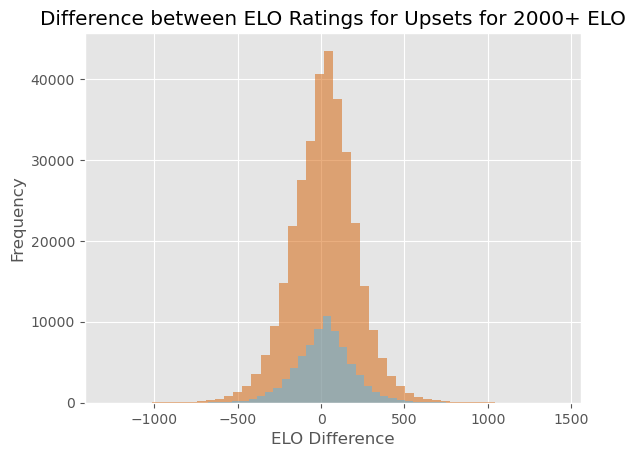

In [31]:
#try and get a better understanding of both graphs by plotting them on top of each other
ax = df_upsets['Elo_diff'].plot(
    kind='hist',
    bins=50,
    title = 'Difference between ELO Ratings for Upsets',
    color = pal[2],
    alpha = 0.5)
#ax.set_xlabel('ELO Difference')

ax = df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500]['Elo_diff'].plot(
    kind='hist',
    bins=50,
    title = 'Difference between ELO Ratings for Upsets for 2000+ ELO',
    color = pal[5],
    alpha = 0.5)

ax.set_xlabel('ELO Difference')
plt.show()
ax.set_xlabel('ElO Difference')
plt.show()

<Axes: title={'center': 'Difference between ELO Ratings for Upsets for 2500+ ELO'}, ylabel='Frequency'>

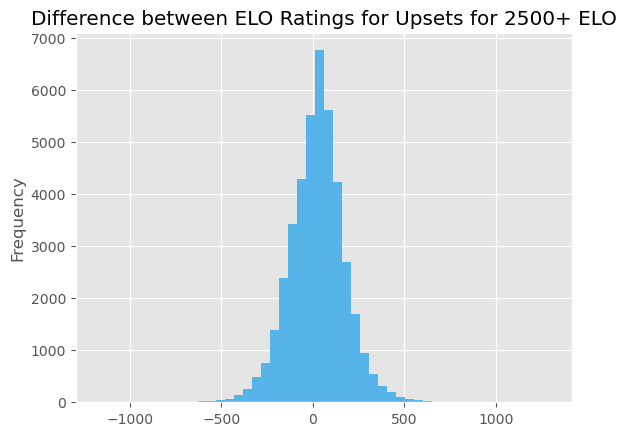

In [32]:
#let us take a look at some of these upsets but only for over the board games
df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500].query(
    'Online == False')['Elo_diff'].plot(
        kind='hist',
        bins=50,
        title = 'Difference between ELO Ratings for Upsets for 2500+ ELO',
        color = pal[5],
        #alpha = 0.5
    )



In [33]:
df_upsets['Elo_diff_abs'] = df_upsets['Elo_diff'].abs()
df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500].query(
    'Online == False').sort_values('Elo_diff_abs', ascending=False)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
313782,1442,"Kholyavko,Mariya","Afanasiev,Nikita",2022-06-21,2022.06.21,Vladimir Dvorkovich Rapid,1-0,NaN,Aktobe KAZ,False,1.2,NaN,NaN,13748505.0,24183555.0,1292,2583,NaN,NaN,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,25,1291,False,1291
72323,1135,"Liu,Chuming",Li Shilong,2016-08-03,2016.07.28,CHN Team Men 2016,1-0,1. e4 e6 2. Qe2 c5 3. Nf3 Nf6 4. g3 d5 5. exd5...,Wuxi CHN,False,8.6,C00,French,8616477.0,8600678.0,1325,2512,Chigorin variation,NaN,GM,Shaanxi,Guangdong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,31,1187,False,1187
256747,1396,"Nasuta,G","Zareba,Piotr",2021-08-07,2021.08.07,PGNiG Polish Cup Lodz,0-1,1. e4 c5 2. Nf3 Nc6 3. Bb5 g6 4. Bxc6 bxc6 5. ...,Lodz POL,False,1.12,B31,Sicilian,1141686.0,21033390.0,2518,1345,"Nimzovich-Rossolimo attack (with ...g6, withou...",GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,31,-1173,True,1173
67659,1128,"Balabayeva,Kseniya","Sjugirov,S",2016-06-18,2016.06.18,Eurasian Blitz Chess Cup,1-0,1. e4 e5 2. f4 d5 3. exd5 exf4 4. Nf3 Nf6 5. B...,Almaty KAZ,False,3.20,C36,KGA,13719688.0,4189302.0,1543,2665,"Abbazia defence, modern variation",NaN,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,24,1122,False,1122
186778,1340,"David,Alb","Kyparissopoulos,Spyridon",2020-07-10,2020.07.10,Aegean Open 2020,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O a6 5. Bd...,Aghios Kirykos GRE,False,1.3,B51,Sicilian,4000013.0,25827359.0,2526,1414,"Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) a...",GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,28,-1112,True,1112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47585,1076,"David,Alb","Borisek,J",2015-06-16,2015.06.14,Mitropa Cup 2015,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. Nc3 Bb4 5. O...,Zillertal AUT,False,3.3,C49,Four knights,4000013.0,14603152.0,2571,2571,"symmetrical, Maroczy system",GM,GM,Italy,Slovenia,team,NaN,NaN,NaN,NaN,NaN,NaN,2015,25,0,False,0
147310,1285,"Oparin,G","Fridman,D",2019-06-20,2019.06.18,St Louis Summer B,1-0,1. Nf3 d5 2. g3 Nf6 3. Bg2 e6 4. O-O c5 5. d4 ...,Saint Louis USA,False,3.1,A07,Reti,24125890.0,11600454.0,2644,2644,King's Indian attack (Barcza system),GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,25,0,False,0
282095,1417,"Van Foreest,Jorden","Alekseenko,K",2021-12-28,2021.12.26,World Rapid 2021,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 d6 5. O-O...,Warsaw POL,False,13.15,C72,Ruy Lopez,1039784.0,4135539.0,2702,2702,"modern Steinitz defence, 5.O-O",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,52,0,False,0
84313,1160,"Xiong,Jeffery","Smirin,I",2017-01-27,2017.01.14,79th Tata Steel GpB,1-0,1. d4 Nf6 2. c4 g6 3. g3 c6 4. Bg2 d5 5. cxd5 ...,Wijk aan Zee NED,False,11.2,E60,King's Indian,2047640.0,2801990.0,2667,2667,3.g3,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,0,False,0


In [34]:
df_upsets['White'].value_counts()

White
Nakamura,Hi        423
Sarkar,J           370
Gunina,V           357
Sarana,A           350
Paravyan,D         322
                  ... 
Rempe,Lennik         1
Ismailov,Makhad      1
Heinrich,J           1
Basey,Matthew        1
Heider,M             1
Name: count, Length: 43667, dtype: int64

In [35]:
df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500].query(
    "Online == False and (White == 'Nakamura,Hi' or Black == 'Nakamura,Hi')"
    ).sort_values('Elo_diff_abs', ascending=False).head(5)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
56760,1094,"Pelletier,Y","Nakamura,Hi",2015-10-19,2015.10.18,31st ECC Open 2015,1-0,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...,Skopje MKD,False,2.4,E97,King's Indian,1301837.0,2016192.0,2557,2816,"orthodox, Aronin-Taimanov, bayonet attack",GM,GM,SCHACHGESELLSCHAFT ZURICH (SUI),OBIETTIVO RISARCIMENTO PADOVA (ITA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,43,259,False,259
56781,1093,"Pelletier,Y","Nakamura,Hi",2015-10-19,2015.10.18,31st ECC Open 2015,1-0,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...,Skopje MKD,False,2.4,E97,King's Indian,1301837.0,2016192.0,2557,2816,"orthodox, Aronin-Taimanov, bayonet attack",GM,GM,SCHACHGESELLSCHAFT ZURICH (SUI),OBIETTIVO RISARCIMENTO PADOVA (ITA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,43,259,False,259
27174,1024,"Yudin,S","Nakamura,Hi",2014-06-20,2014.06.19,FIDE World Blitz 2014,1-0,1. e4 e6 2. d4 d5 3. Nd2 Be7 4. Ngf3 Nf6 5. e5...,Dubai UAE,False,16.3,C03,French,4159659.0,2016192.0,2546,2775,Tarrasch,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,25,229,False,229
77251,1144,"Nakamura,Hi","Bok,B",2016-10-05,2016.10.01,chess.com IoM Masters,0-1,1. d4 Nf6 2. c4 g6 3. f3 e6 4. e4 c5 5. d5 d6 ...,Douglas ENG,False,5.4,E60,King's Indian defence,2016192.0,1017063.0,2787,2594,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,40,-193,True,193
115558,1225,"Izoria,Z","Nakamura,Hi",2018-04-25,2018.04.18,ch-USA 2018,1-0,1. Nf3 g6 2. e4 Bg7 3. d4 d6 4. Bc4 Nf6 5. Qe2...,Saint Louis USA,False,7.3,A04,Reti opening,13601733.0,2016192.0,2599,2787,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,17,188,False,188


## Use the python-chess library to analyze games

### Pull the PGN file from the archive (Pelletier,Y vs Nakaumura, Hi)

In [37]:
with open(r'C:\Chess-Data-Analysis\pgns\twic1094.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers['Event'] == '31st ECC Open 2015') & (
            game.headers['Round'] == '2.4'):
            if game.headers['Black'] == 'Nakamura,Hi':
                break        

In [38]:
game.headers

Headers(Event='31st ECC Open 2015', Site='Skopje MKD', Date='2015.10.19', Round='2.4', White='Pelletier,Y', Black='Nakamura,Hi', Result='1-0', WhiteTitle='GM', BlackTitle='GM', WhiteElo='2557', BlackElo='2816', ECO='E97', Opening="King's Indian", Variation='orthodox, Aronin-Taimanov, bayonet attack', WhiteTeam='SCHACHGESELLSCHAFT  ZURICH (SUI)', BlackTeam='OBIETTIVO RISARCIMENTO PADOVA (ITA)', WhiteFideId='1301837', BlackFideId='2016192', EventDate='2015.10.18')

In [39]:
game.mainline_moves()

<Mainline at 0x238f14164d0 (1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 O-O 6. Be2 e5 7. O-O Nc6 8. d5 Ne7 9. b4 a5 10. Ba3 b6 11. bxa5 Nh5 12. Nd2 Nf4 13. axb6 Rxa3 14. Nb5 Ra5 15. bxc7 Qd7 16. a4 Ba6 17. Nb3 Bxb5 18. cxb5 Qxc7 19. Nxa5 Qxa5 20. g3 Nxe2+ 21. Qxe2 Bh6 22. Rfb1 Rb8 23. b6 Rxb6 24. Rxb6 Qxb6 25. a5 Qc5 26. Ra4 Kg7 27. a6 Nc8 28. Rc4 Qb5 29. Qa2 Nb6 30. Rc6 Na4 31. a7 Qa5 32. Kg2 Qxa7 33. Rc4 Bg5 34. Qxa4 Qb7 35. Rb4 Qc7 36. Qc6 Qa7 37. Qxd6 Be7 38. Qxe5+)>

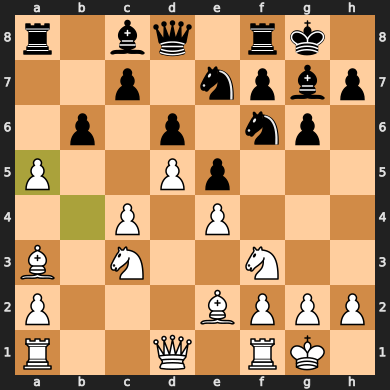

In [40]:
board = chess.Board()
for ply, move in enumerate(game.mainline_moves()):
    board.push(move)
    if ply == 20:
        break
board

### Integrate stockfish with our code to evaluate the position 

In [41]:
import stockfish

In [49]:
STOCKFISH_PATH = r'C:\Chess-Data-Analysis\stockfish\stockfish-windows-x86-64-avx2.exe'
from stockfish import Stockfish

stockfish = Stockfish(
    path = STOCKFISH_PATH, 
    depth = 18, 
    parameters = {"Threads": 32, "Minimum Thinking Time": 15},
)

### PNGs vs. FENs
- PNG is a list of all the moves i nthe game and the metadata
- FEN is the notation for the board setup at any given positions 

In [50]:
#setup stockfish to use the curretn position
stockfish.set_fen_position(board.fen())

In [51]:
#use stockfish to get evaluation of the postion
stockfish.get_evaluation()

{'type': 'cp', 'value': 54}

### Loop over the game and evaluate each step 

In [52]:
from tqdm.notebook import tqdm

0it [00:00, ?it/s]

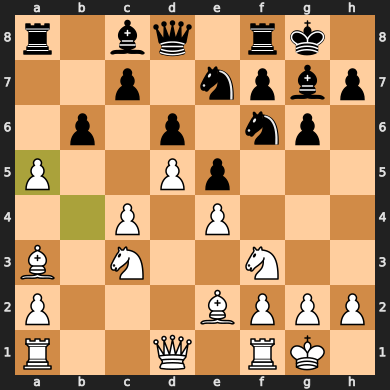

In [54]:
results = []
board = chess.Board()
for ply, move in tqdm(enumerate(game.mainline_moves())):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)
    if ply == 20:
        break
board

In [56]:
pd.DataFrame(results)['value']

0     29
1     30
2     29
3     35
4     34
5     62
6     61
7     61
8     53
9     58
10    55
11    60
12    58
13    67
14    70
15    71
16    70
17    74
18    56
19    56
20    59
Name: value, dtype: int64

**These values are the Centipawn Loss (CPL) values. It represents how much "value" a player drops by making incorrect moves during a chess game. Positive values mean that the stockfish engine believes that white is winning and vice-versa**

<Axes: title={'center': 'Stockfish Evaluation of Game'}>

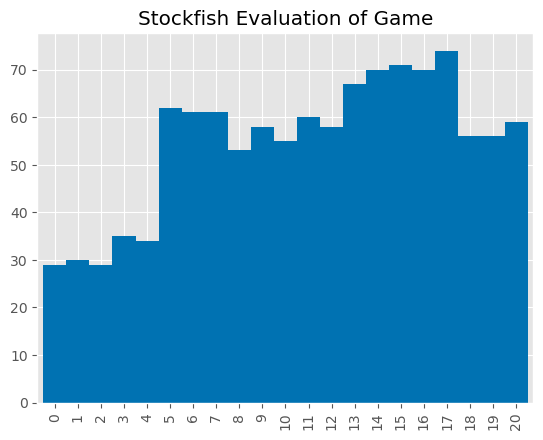

In [57]:
pd.DataFrame(results)['value'].plot(kind = 'bar', width = 1, title = 'Stockfish Evaluation of Game')    


  0%|          | 0/75 [00:00<?, ?it/s]

<Axes: title={'center': 'Stockfish Evaluation of Game'}>

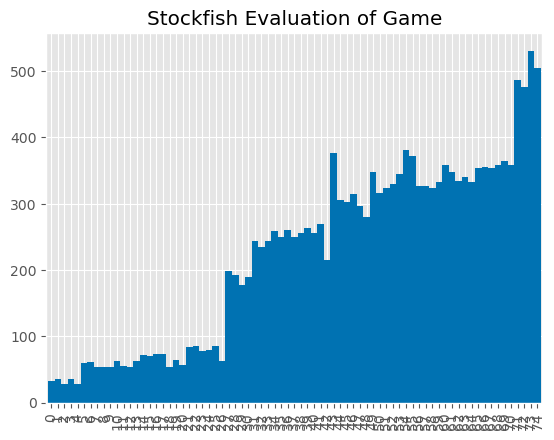

In [58]:
#evaluation for the entire game

results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])

for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)
    # if ply == 20:
    #     break
board



<Axes: title={'center': 'Stockfish Evaluation of Game'}>

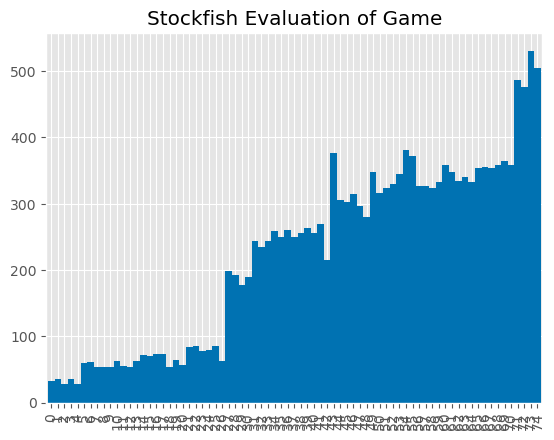

In [59]:
pd.DataFrame(results)['value'].plot(kind = 'bar', width = 1, title = 'Stockfish Evaluation of Game')    


## Run the evaluation for another game
I chose to look into one of my favorite chess players and current India Number 1 : Vidhit Gujarathi

In [63]:
df_upsets.loc[df_upsets[['WhiteElo', 'BlackElo']].max(axis=1) > 2500].query(
    "Online == False and (White == 'Vidit,S' or Black == 'Vidit,S') and Year > 2019"
    ).sort_values('Elo_diff_abs', ascending=False).head(5)


#df_upsets.loc[df_upsets['White'].str.contains('Vidit')].query('Online == False').sort_values('Elo_diff_abs', ascending=False).head(10)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Week,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
282560,1417,"Vidit,S","Muradli,Mahammad",2021-12-29,2021.12.29,World Blitz 2021,0-1,1. d4 Nf6 2. c4 g6 3. g3 c5 4. dxc5 Na6 5. Bg2...,Warsaw POL,False,8.23,E60,King's Indian,5029465.0,13409301.0,2727,2503,3.g3,GM,IM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,52,-224,True,224
283219,1417,"Vidit,S","Kobalia,M",2021-12-30,2021.12.29,World Blitz 2021,0-1,1. d4 d5 2. c4 c6 3. Nf3 Nf6 4. cxd5 cxd5 5. N...,Warsaw POL,False,16.21,D13,QGD Slav,5029465.0,4119150.0,2727,2596,exchange variation,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,52,-131,True,131
287174,1421,"Vidit,S","Praggnanandhaa,R",2022-01-26,2022.01.15,84th Tata Steel Masters,0-1,1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qc2 O-O 5. a3...,Wijk aan Zee NED,False,10.4,E32,Nimzo-Indian,5029465.0,25059530.0,2727,2612,classical variation,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,4,-115,True,115
276239,1411,"Gukesh,D","Vidit,S",2021-11-20,2021.11.20,Tata Steel India Blitz,1-0,1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. Nc3 Be7 5. Bf4...,Kolkata IND,False,9.3,D37,QGD,46616543.0,5029465.0,2621,2727,classical variation (5.Bf4),GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,46,106,False,106
276286,1411,"Vidit,S","Gukesh,D",2021-11-21,2021.11.20,Tata Steel India Blitz,0-1,1. d4 Nf6 2. c4 g6 3. g3 Bg7 4. Bg2 O-O 5. Nc3...,Kolkata IND,False,18.3,E68,King's Indian,5029465.0,46616543.0,2727,2621,"fianchetto, classical variation, 8.e4",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,46,-106,True,106


In [67]:
with open(r'C:\Chess-Data-Analysis\pgns\twic1417.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers['Event'] == 'World Blitz 2021') & (
            game.headers['Round'] == '8.23'):
            if game.headers['White'] == 'Vidit,S':
                break        

  0%|          | 0/85 [00:00<?, ?it/s]

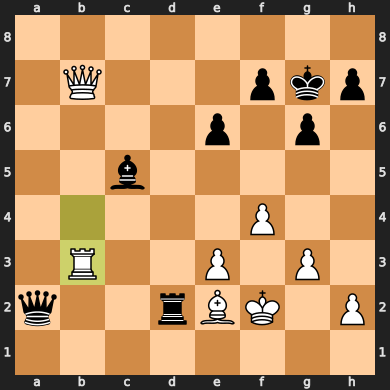

In [68]:
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])

for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)
    # if ply == 20:
    #     break
board


<Axes: title={'center': 'Stockfish Evaluation of Game'}>

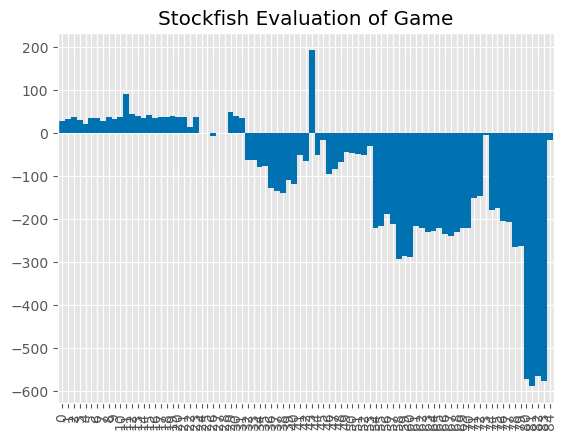

In [69]:
pd.DataFrame(results)['value'].plot(kind = 'bar', width = 1, title = 'Stockfish Evaluation of Game')    


**Looks like one bad move could have cost Vidit's opponent the game (more than once) but he failed to capitalize on it and eventaully ended up losing**